In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.pyplot import subplot
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
Wine = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
Wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
Wine.shape

(1599, 12)

In [4]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
Wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
Wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

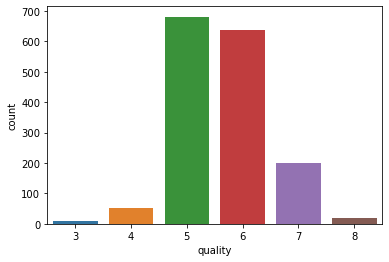

In [7]:
sns.countplot(Wine['quality'])

<function matplotlib.pyplot.show(close=None, block=None)>

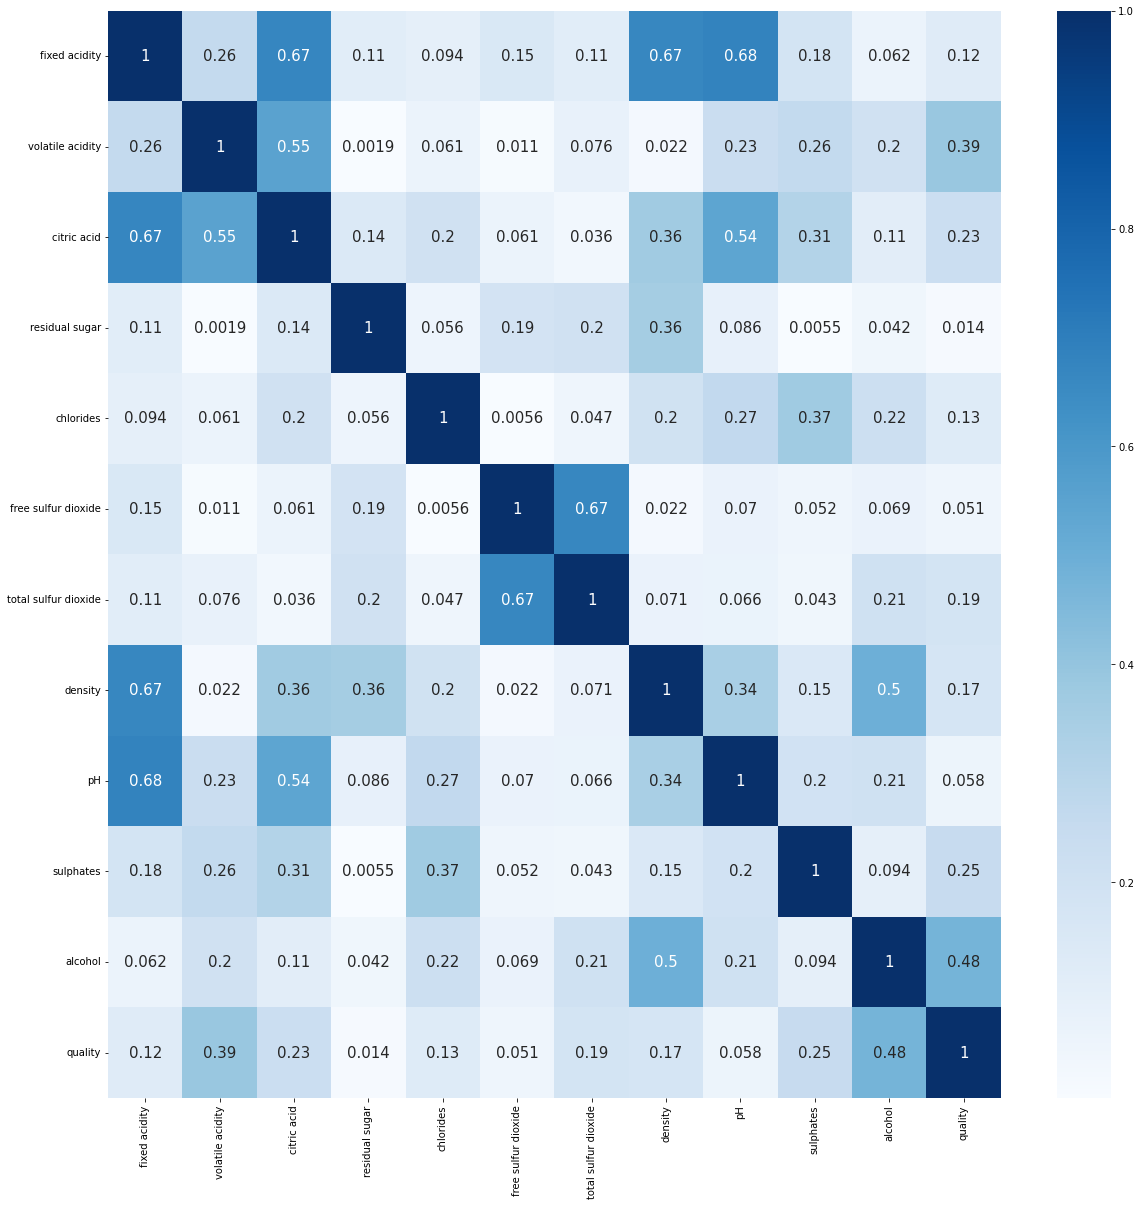

In [8]:
#to find the relationship between features and label
df_corr = Wine.corr().abs()

plt.figure(figsize = (20,20))
sns.heatmap(df_corr,annot = True,cmap='Blues', annot_kws = {'size': 15})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

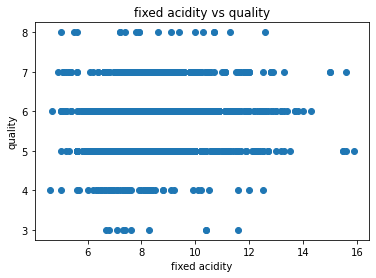

In [9]:
# As per above heat map i see that fixed acidity and ph is looking highly corilated
# to make sure that they are highly co related
plt.scatter(Wine['fixed acidity'], Wine.quality)
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.title('fixed acidity vs quality')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

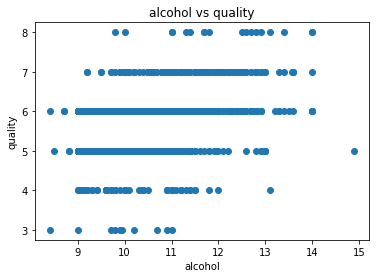

In [10]:
# As per above heat map i see that fixed acidity and ph is looking highly corilated
# to make sure that they are highly co related
plt.scatter(Wine['alcohol'], Wine.quality)
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.title('alcohol vs quality')
plt.show

In [11]:
Wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

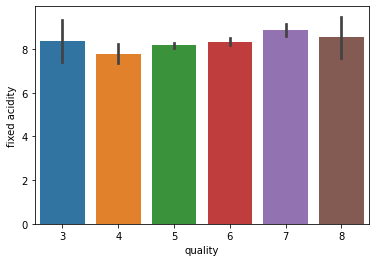

In [12]:
sns.barplot(y='fixed acidity', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

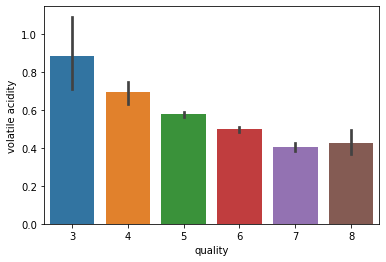

In [13]:
sns.barplot(y='volatile acidity', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

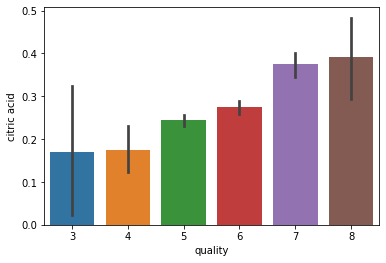

In [14]:
sns.barplot(y='citric acid', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

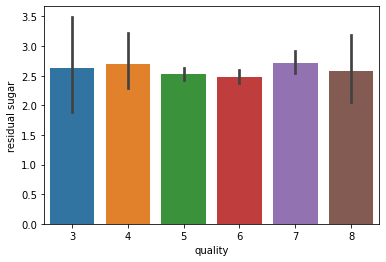

In [15]:
sns.barplot(y='residual sugar', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

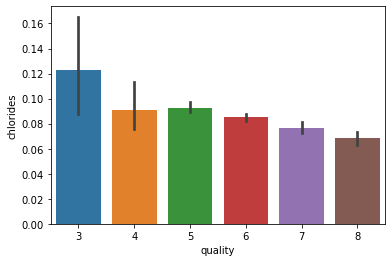

In [16]:
sns.barplot(y='chlorides', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

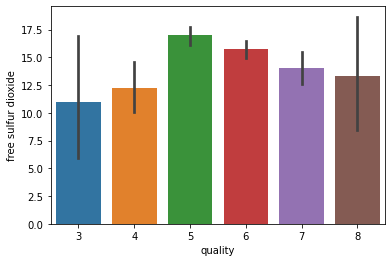

In [17]:
sns.barplot(y='free sulfur dioxide', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

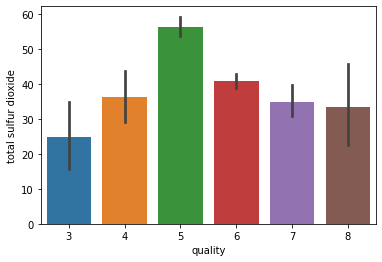

In [18]:
sns.barplot(y='total sulfur dioxide', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='density'>

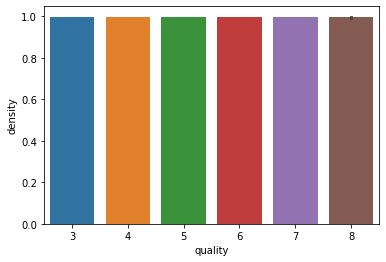

In [19]:
sns.barplot(y='density', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

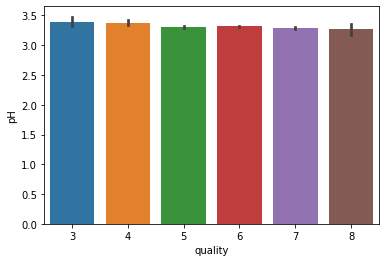

In [20]:
sns.barplot(y='pH', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

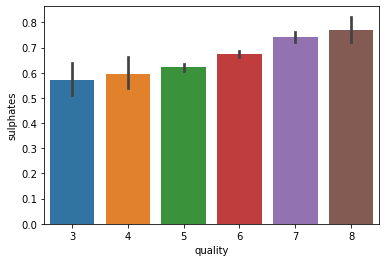

In [21]:
sns.barplot(y='sulphates', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

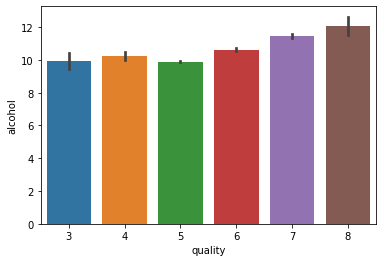

In [22]:
sns.barplot(y='alcohol', x='quality', data=Wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

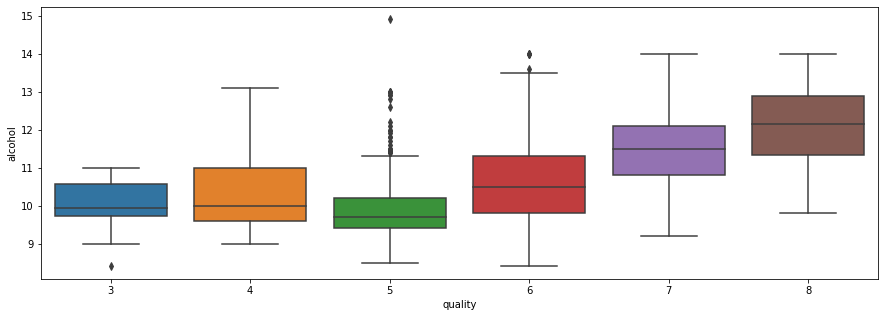

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'quality', y = 'alcohol', data = Wine)

In [24]:
#to find min and max quality score
Wine['quality'].min()

3

In [25]:
Wine['quality'].max()

8

In [26]:
values = (2, 6, 9)
qual = ['bad', 'good']
Wine['quality'] = pd.cut(Wine['quality'], bins = values, labels = qual)
Wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Now, we have 2 groups i.e. good quality and bad quality wine. This helps us with label encoding to classify data better.



In [27]:
Wine['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [28]:
label_enc = LabelEncoder()
Wine['quality']=label_enc.fit_transform(Wine['quality'])

SPLITTING TRAINING AND TESTING DATA

In [29]:
X = Wine.drop('quality',axis=1)
y = Wine.quality

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

#scaling the data and normalizing it to a particular range of values

In [31]:
std_scale = StandardScaler()
xtrain = std_scale.fit_transform(xtrain)
xtest = std_scale.fit_transform(xtest)

In [32]:
#Classification model 1
model = svm.SVC()
model.fit(xtrain,ytrain)
y0_pred = model.predict(xtest)
print(accuracy_score(ytest,y0_pred))

0.875


In [33]:
#Classification model 2
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
y1_pred = rf.predict(xtest)
print(accuracy_score(ytest,y1_pred))

0.88125


In [34]:
print(confusion_matrix(ytest,y1_pred))

[[265   8]
 [ 30  17]]


In [35]:
# We have 6 + 33 = 39 false predictions!!!

In [36]:
x=Wine.drop('quality', axis = 1)
y= Wine['quality']

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
#Normalize using MinMaxScaler to constrain values to between 0 and 1.

In [39]:
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit_transform(x)

x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [41]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression()
model = classifier_log.fit(xtrain,ytrain)

y_pred_log = classifier_log.predict(xtest)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_log, ytest)*100)

87.5


In [42]:
from sklearn.tree import DecisionTreeClassifier

# doing pruning to avoid overfitting
classifier_tree=DecisionTreeClassifier(criterion ='gini', splitter = 'random',
                         max_leaf_nodes = 10, min_samples_leaf = 5, 
                         max_depth = 6)
model = classifier_tree.fit(xtrain, ytrain)

y_pred_tree = classifier_tree.predict(xtest)

print(accuracy_score(y_pred_tree, ytest)*100)

84.0625


In [43]:
print(classification_report(ytest,y1_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.68      0.36      0.47        47

    accuracy                           0.88       320
   macro avg       0.79      0.67      0.70       320
weighted avg       0.87      0.88      0.87       320

